# Titanic: Machine Learning from Disaster  
###### 온라인 코어 2기 박수경

이번 토이 프로젝트는 데이터로부터 유의미한 결과값을 예측할 수 있는 모델을 만들어, 원하는 타겟을 도출하는 과정을 수행한 것이다. 데이터를 불러와 여러가지 전처리 기법을 사용하고 탐색적으로 분석하는 등의 Mining과 Analysis를 거친다. 그 후 모델의 검증과 평가를 거쳐 test 데이터를 입력하게 된다.  
데이터는 캐글의 Titanic - Machine Learning from Disaster을 사용했다. Evaluation의 기준이 되는 타겟은 생존여부(Survived: 0 or 1)이다.

데이터 출처: https://www.kaggle.com/c/titanic

## Data acquisition and Basic description

프로젝트 수행에 필요한 기본 라이브러리를 불러온다. 데이터를 불러 와 변수에 할당한다.

In [82]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [83]:
train_df = pd.read_csv('~/aiffel/Exploration/E05/data/train.csv') 
test_df = pd.read_csv('~/aiffel/Exploration/E05/data/test.csv') 
combine = [train_df, test_df]

train_df.head(2)
test_df.head(2)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [84]:
train_df0 = train_df.copy() #원본 백업

In [85]:
print('+++++++++++++++++++++++++++++++')
print('Train size:', train_df.shape)
print('Test size:', test_df.shape)
print('-------------------------------')
print('Train columns :', train_df.columns.values)
print('Test columns :', test_df.columns.values )
print('+++++++++++++++++++++++++++++++')

+++++++++++++++++++++++++++++++
Train size: (891, 12)
Test size: (418, 11)
-------------------------------
Train columns : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test columns : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
+++++++++++++++++++++++++++++++


각 데이터의 columns를 들여다 보면 test 데이터에 타겟 열이 없는 것 외에는 열 구성이 동일하다. 

In [86]:
train_df.head(10)
# dir(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [87]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


데이터가 가진 피처의 개수, 각 피처의 데이터 타입, 결측치 유무를 알 수 있다.

## Preprocessing

### 변수 제거 

In [88]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


피처들을 살펴보고 주요한 피처들만으로 학습을 진행하기로 했다. 각각의 피처를 drop한 근거는 다음과 같다.  
단순히 인덱스를 의미하는 PassengerId, 일단은 아무런 연관성이 보이지 않는 Name,  
피처 값의 형태가 너무 일관성이 없고 그 속에서 정제를 통해 유의미한 피처를 끌어내기도 어려울 것 같은 Ticket,  
거리와 클래스를 다 고려해서 정해지므로 아무 관련이 없어보이는 fare,  
결측치가 너무나 많아 학습을 오히려 방해하는 쓸모없는 Cabin.  
총 5개의 피처를 삭제했다.

In [89]:
train_df.info()
train_df_temp = train_df.copy()
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4

train에는 총 891명의 데이터가 저장되어 있다. 그 중 결측치가 있는 행은 Age, Embarked 이다.

In [90]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


### 결측치 채우기

In [91]:
train_df['Age'] = train_df['Age'].fillna(0) # 결측치 다른값으로 채웠을 것 같다.
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
#인덱스넘버
print('The most frequent value:',train_df['Embarked'].mode()[0])
train_df.info()

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


age 컬럼은 결측치를 무시할 수 없을만큼 있지만 유의미하다고 추측하는 컬럼이므로 삭제하는 대신 다른 방법을 찾아보았다.  
시도하지 못한 부분을 Discussion에 남긴다.
결측치가 있는 데이터 개수가 딱 2개인 승선지는 최빈값으로 채워준다.

In [92]:
train_df['Embarked'].mode()[0]

'S'

In [93]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [94]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,0.0,1,2,S
889,1,1,male,26.0,0,0,C
890,0,3,male,32.0,0,0,Q


### 변수 변환

In [95]:
train_df["Sex"] = train_df["Sex"].astype('category')
train_df["Sex"] = train_df["Sex"].cat.codes #인코딩넘버 부여 기준?



train_df["Embarked"] = train_df["Embarked"].astype('category')
train_df["Embarked"] = train_df["Embarked"].cat.codes

train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
888,0,3,0,0.0,1,2,2
889,1,1,1,26.0,0,0,0
890,0,3,1,32.0,0,0,1


피처  
sex : 0(female), 1(male)  
Embarked : 0 (C), 1(Q), 2(S)] 를

cat.codes 로 카테고리화를 시켰다. 

In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 36.7 KB


## Data Mining and Visualization

### 데이터 통계량 탐색  
- 아래 코드 블럭을 통해서 일반적인 통계치를 확인한다.  
- mean, std, min, 25%, 50%, 75%, max 값등을 확인 가능하다.  
- 25%, 50%, 75%을 통해서 IQR 도 계산이 가능하다.  

In [97]:
train_df.describe() ## 박스플랏 그려보기

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,1.536476
std,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


IQR은 Q3 - Q1, 즉 상위 25%와 75%의 경계가 되는 값들의 차이이므로 각 열 별로 계산할 수 있다. 

In [98]:

a = train_df.describe()
a.iloc[6, :]  - a.iloc[4, :]

Survived     1.0
Pclass       1.0
Sex          1.0
Age         29.0
SibSp        1.0
Parch        0.0
Embarked     1.0
dtype: float64

IQR를 계산해보면 Age컬럼에서 특별하게 높음을 알 수 있다. 따라서 적절한 스케일링이 필요하다.

groupby 함수로 컬럼별로, 각 피처클래스에서 생존 사망 비율를 구해 본다. sort_values를 이용해서 가장 생존율이 높은 피처클래스부터 순서대로 출력한다.

In [99]:
for i in range(1,train_df.shape[1]):    #df.shape[1] will give you the number of columns present in the dataFrame.
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009


- 위 코드블럭을 자세히 분석해 보면 다음과 같다.

1) 메서드는 연쇄적이다.
2) for i in range(1,train_df.shape[1]) 에서, train.df.shape는 (행 개수, 열  개수) 이고 그중 [1]은 열 개수 이므로 피처의 총 개수이다. range는 1부터 시작이므로 [0]인 "Survived"를 제외한 피처들에 대해 for문을 수행한다.  
3) train_df[[train_df.columns[i], "Survived"]], 즉 각 칼럼과 뒤에 서바이브드 열을 붙인 데이터가 만들어진다.
4) groupby.함수를 통해 지정 열(i번째)에서,그 열의 원소에 대한 "survived"의 통계량을 쉽게 확인할 수 있다. 이번에는 생존 사망자의 비율을 의미하게 되는 mean을 구한다.
5) 그리고 어떤 그룹(피처클래스)이 높은 mean을 가지는지 sorting. (내림차: ascending='False')

### Label과의 연관성

In [100]:
for i in range(1,train_df.shape[1]):    #df.shape[1] will give you the number of columns present in the dataFrame.열의 개수
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009


### 각 변수들의 분포도

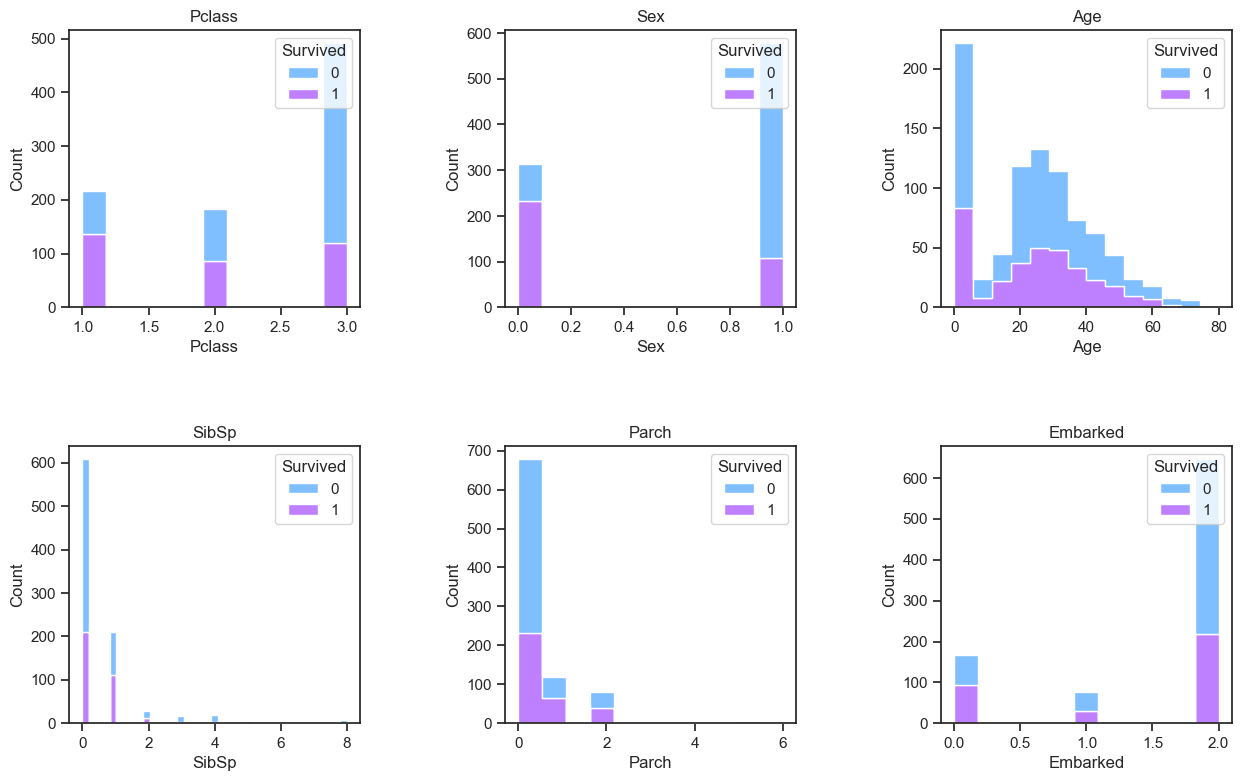

In [101]:
col_name = train_df.columns[1:]

fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

for i in range(col_name.shape[0]):
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',palette='cool', #hue : 색깔을 통해서 구분.
                 multiple="stack",ax=axs[i], element="step")
    axs[i].set_title(col_name[i])

In [102]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
888,0,3,0,0.0,1,2,2
889,1,1,1,26.0,0,0,0


In [103]:
train_df.iloc[:5 , 3:]  #  행, 렬 (인덱스 0)
#세는 건  0 ~  시작점(포함): 끝점(포함하지않음_stop)

,Age,SibSp,Parch,Embarked
0,22.0,1,0,2
1,38.0,1,0,0
2,26.0,0,0,2
3,35.0,1,0,2
4,35.0,0,0,2


In [104]:
np.random.randint(0,100,size=train_df.iloc[:,1:].shape)/400

array([[0.1825, 0.1625, 0.2475, 0.09  , 0.105 , 0.0675],
       [0.135 , 0.23  , 0.245 , 0.1975, 0.0925, 0.1225],
       [0.2225, 0.235 , 0.24  , 0.03  , 0.225 , 0.0675],
       ...,
       [0.045 , 0.11  , 0.005 , 0.2125, 0.03  , 0.22  ],
       [0.0175, 0.165 , 0.0925, 0.1225, 0.04  , 0.065 ],
       [0.115 , 0.125 , 0.17  , 0.1325, 0.0525, 0.005 ]])

<Figure size 600x600 with 0 Axes>

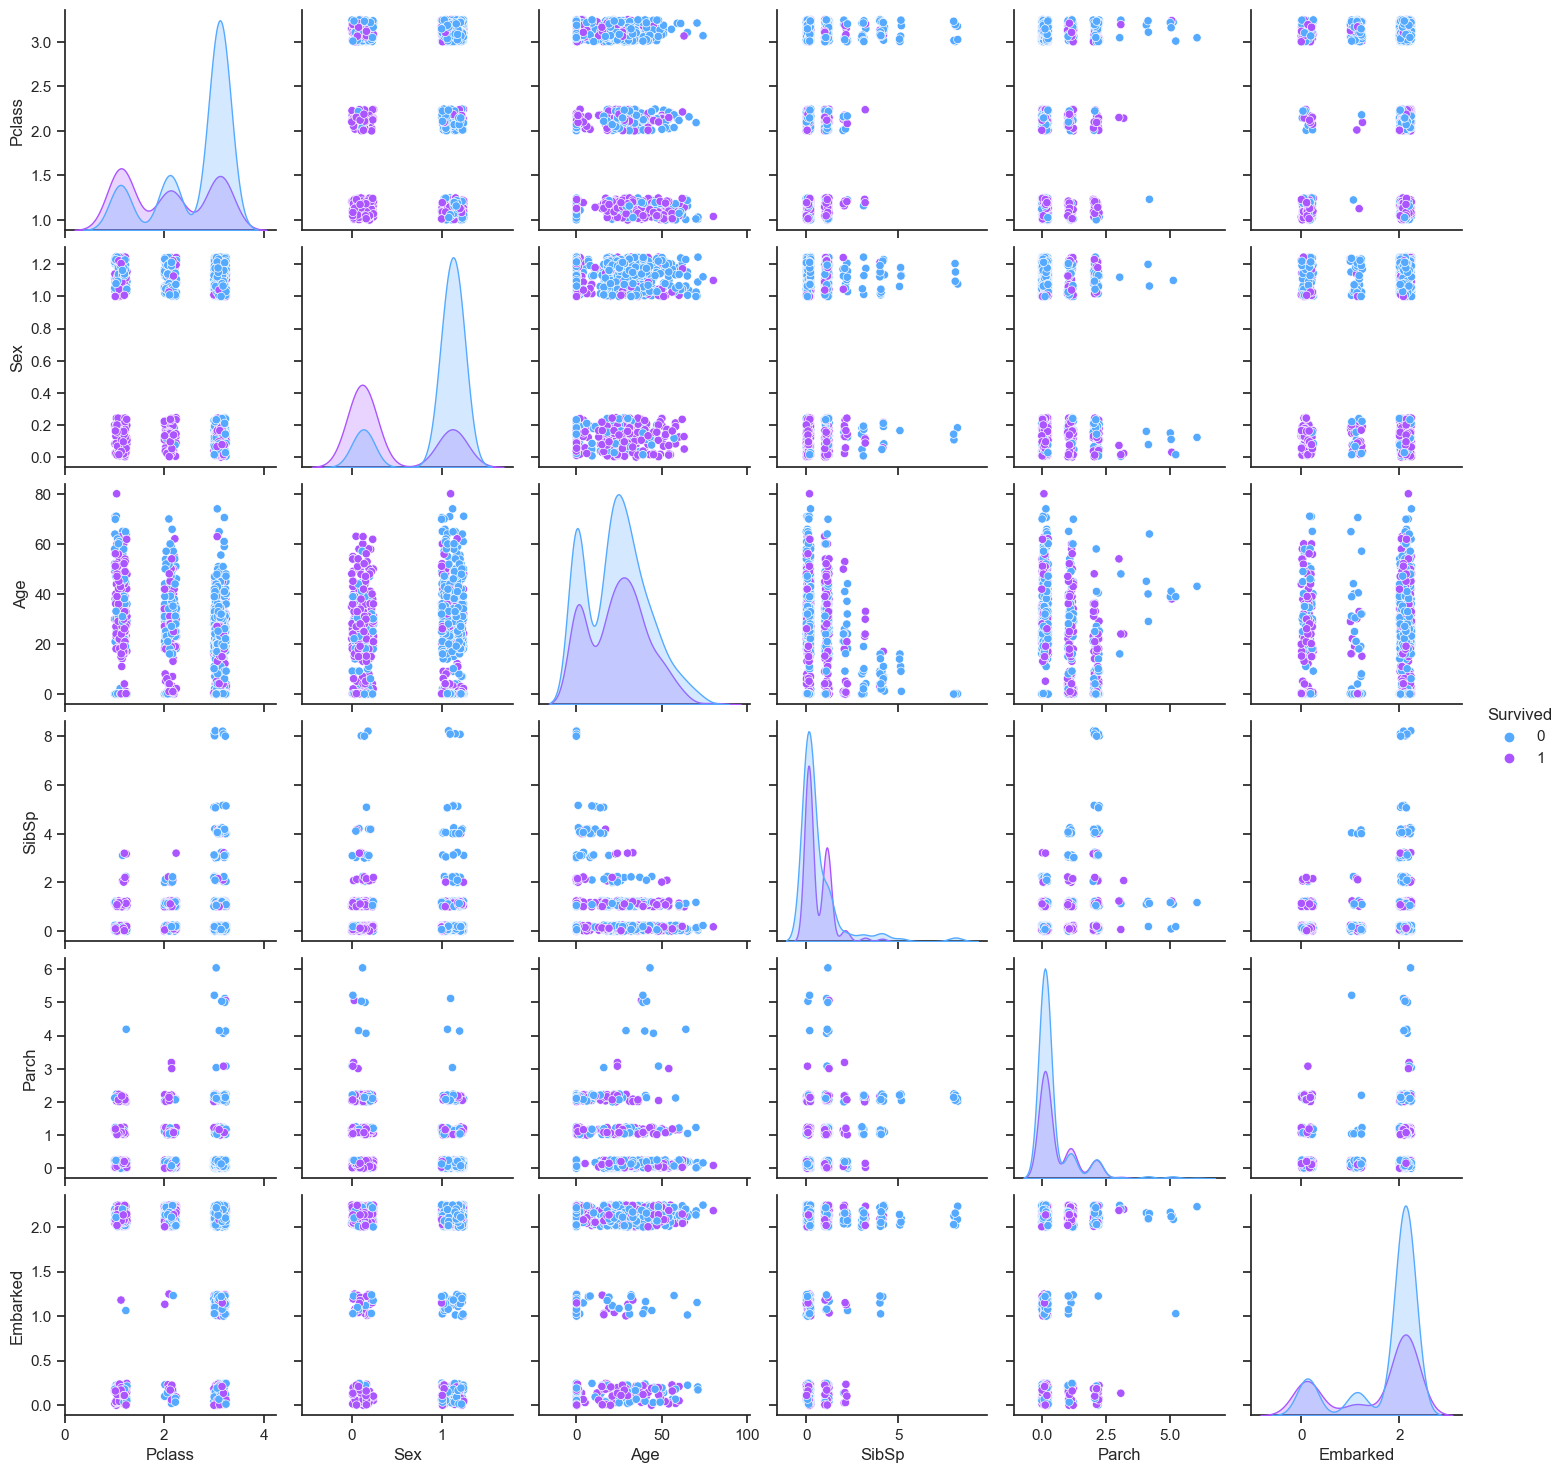

In [105]:
train_df_rand = train_df.copy() #백업

plt.figure(figsize=(6,6))
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape),   # randint ->int난수생성 (난수의 범위시작, 끝, )
                  columns=train_df.iloc[:,1:].columns)/400 #400은 적절한 스코프를 맞춰주는 그냥 수...

train_df_rand.iloc[:,1:] = train_df.iloc[:,1:] + rand 
# rand : 랜덤 인자를 더해줘서 분포도를 좀 더 부피감있게, 더 부풀려서 보기 위해
#그리고 데이터 범주가 적고 descrete 되어 있을때는 그 단절되고,집중된 값을 조금 퍼져 보이게 이런 처리를 한다.
# rand 값 자체 아주 작은 수이다. 
# # 작은 수이기 때문에 음수도 크게 영향이 없지만 살을 찌우기 위한 거라서 음수보다는 양수가 유리.

sns.set(style="ticks")
sns.pairplot(train_df_rand ,hue='Survived',palette='cool') 




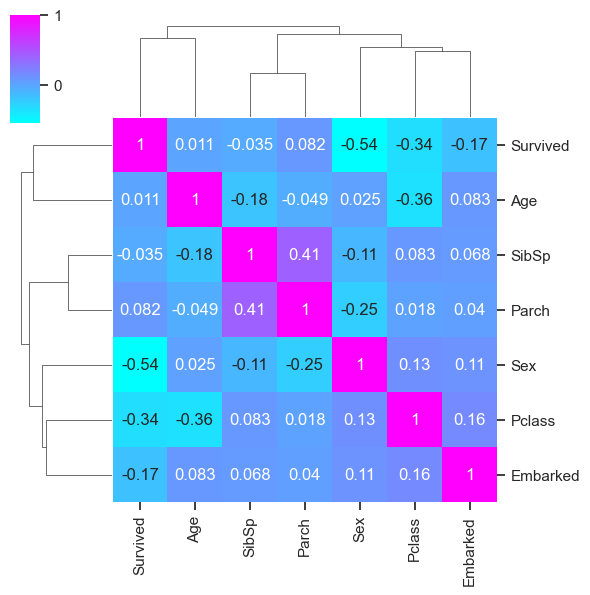

In [106]:
corr = train_df.corr() #상관계수 범위: -1 ~ 1, 0에 가까울 수록 관련이 없다.
sns.clustermap(corr,annot = True,cmap = 'cool', figsize=(6,6)) 

## Data Analysis and Modeling

### train/test 데이터 준비

In [107]:
X_train = train_df.drop(['Survived'], axis=1) #survived 드랍 (타겟이기 때문에)
y_train = train_df['Survived']
print(X_train.shape,y_train.shape)

(891, 6) (891,)


### test 데이터 처리

In [108]:
test_df = test_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
test_df['Age'] = test_df['Age'].fillna(0)
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
print('The most frequent value:',test_df['Embarked'].mode()[0])
test_df["Sex"] = test_df["Sex"].astype('category')
test_df["Sex"] = test_df["Sex"].cat.codes

test_df["Embarked"] = test_df["Embarked"].astype('category')
test_df["Embarked"] = test_df["Embarked"].cat.codes


test_df.info()
X_test = test_df.copy()
print(X_test.shape)

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int8   
dtypes: float64(1), int64(3), int8(2)
memory usage: 14.0 KB
(418, 6)


### Cross validation + Model evaluation

In [109]:
from sklearn.model_selection import KFold #교차검증
from sklearn.metrics import accuracy_score  #정확도
from sklearn.metrics import f1_score # F1 스코어: 리콜, 프리시젼 조화평균. (둘다고려)
from sklearn.svm import SVC #서포트 벡터머신 모델
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier #의사결정트리 분류모델
from sklearn.linear_model import  LogisticRegression, SGDClassifier # 로지스틱회귀, SGD분류계
from sklearn.ensemble import RandomForestClassifier ##랜덤 포레스트

import matplotlib.ticker as ticker ### 눈금 설정 (메이저: 주눈금, 마이너: 보조눈금)
from sklearn.metrics import roc_curve ###  roc커브
from sklearn.metrics import roc_auc_score ### area under curve

In [110]:
def kfold(X_train, y_train, clf):  #함수 정의 Kfold, '지역변수'
    clf_score = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
    global X_tra, X_val, y_tra, y_val, y_pred
    for tra_index, val_index in kf.split(X_train):
        X_tra, X_val = X_train.iloc[tra_index,:], X_train.iloc[val_index,:]
        y_tra, y_val = y_train.iloc[tra_index], y_train.iloc[val_index]
        
        clf.fit(X_tra, y_tra) 
        
        y_pred = clf.predict(X_val) 
        clf_score.append(clf.score(X_tra,y_tra))
    print("Score:", np.mean(clf_score))

Kfold 교차검증. 내부적으로 k개로 데이터를 split해서 교차적으로 검증 데이터로 삼아가면서 학습과 예측을 진행하게 된다. k의 수만큼 학습-예측을 수행하므로 분류모델 스코어를 그 수만큼 나누어 평균치를 적용한다.

In [111]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors = 3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models: # for i in range(1,5)# [1,2,3,4]
    print('===================================')
    print("model:",clf)
    kfold(X_train,y_train,clf) 


y_predict = clf.predict(X_test)

model: SVC(gamma='auto')
Score: 0.8754203633956852
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.8703704871015019
model: SGDClassifier(max_iter=100)
Score: 0.7365491592732087
model: SGDClassifier()
Score: 0.719142884157776
model: LogisticRegression()
Score: 0.7946152512725153
model: DecisionTreeClassifier(max_depth=10)
Score: 0.9203141497391935
model: RandomForestClassifier()
Score: 0.9424815229210332


### ROC-AUC 확인하기

AUC: 0.781711525189786


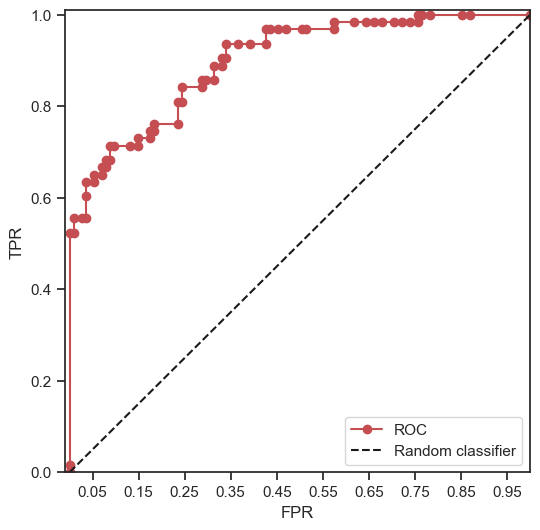

In [112]:
clf = LogisticRegression(solver='lbfgs') #하이퍼 패러미터 
clf.fit(X_tra,y_tra)
pred_proba_class1 = clf.predict_proba(X_val)[:,1]

plt.figure(figsize=(6,6))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class1) # false positive rate 폴아웃, tprs(tru positive rate )= 리콜
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(y_pred, y_val)    

print("AUC:",roc_auc_score(y_pred,y_val))

이상적인 성능의 모델의 AUC는 1이다. (그래프가 정사각형이 될 때 넓이 1). AUC가 높을수록 성능이 좋다고 표현할 수 있다.

## Discussion  



- 스코프 조절, 시각화 효과 증대

데이터들이 한 곳에 너무 점처럼 모여 있어서 시각화의 효과가 떨어질 때에는 여러가지 방법으로 그래프를 더 직관적으로 와닿을 수 있게 나타내는 것이 중요하다고 생각했다. 특히 cat.codes를 이용해 한 피처를 숫자 카테고리를 나타낼 때, 그값들은 연속적이지 않기때문에 필연적으로 정수 부분에 다닥다닥 모여있게 된다. 이 때 본 과제의 코드에서는 아주 작은 난수들을 임의로 더해주어 variation을 조금 추가한 방법으로 그래프를 훨씬 더 데이터 특징을 표현하는 데 알맞게 만들었다. 한 점 위주로 아주 많이 겹쳐있던 데이터들을 0/400~ 100/400 의 난수를 더해주어 원래 데이터에 큰 영향을 미치지는 못하지만 볼륨감을 조금 더 주고 좀더 퍼뜨리게 하였다. 처음 접하는 방법이어서 재미있고 신기했다. 피처들의 값이 연속적이지 않고 그 가짓수나 범위가 작을 때 앞으로도 이 방법을 사용할 수 있을 것 같다. 


- 비닝

age컬럼의 값을 시각화하면 1살단위로는 한 나이값에 대해 데이터 수가 너무 적다는 것을 느꼈다. 그래서 적당한 구간으로 자르면 좋겠다는 생각을 했다. 비닝을 시행하고 나서도 나이대는 다른컬럼의 0~8정도까지의 수에 비해 진폭이 크므로(0~80), minmax 같은 스케일러를 적용하면 좋을 것 같았다. 이 때 타겟값인 'survived' 는 제외하고 스케일링 해야 한다. 그리고 스케일링을 했다면 test 데이터에도 똑같이 처리를 해 주어야 한다.  

age 컬럼은 처음에 결측치가 제법 있었다. 단순히 0으로 채우는 것은 좋은 방법이 아닌 것 같아 이후에 여러가지 방법을 생각해 보았다.  
일단 age 피처 안에서 결측치 있는 행을 삭제하고 대강의 분포를 본다. 나이의 분포는 영유아, 청장년, 노인 3가지 그룹으로 다시 묶어보는 것도 좋을 것 같은 그래프를 나타내고 있었다.  

![](data/age.png)  

산 사람과 죽은 사람의 비율이 비슷한 구간으로 자르면 자른 구간 안에서는 적당이 일관된 비율값을 나타낼 것이다. 그때, 각 구간의 데이터 개수를 a, b, c개라고 하면 age 컬럼의 결측값있는 데이터를 a:b:c 의 비율로 각각의 구간에 나누어주고, 각각 구간에 들어간 결측값은 그 구간의 대푯값으로 결측치를 채우면 조금 더 합리적이지 않을까 하는 생각이 들었다.


- 피쳐 엔지니어링

sibsp 와 parch 컬럼은 연관성이 조금 있어보였다. 두 컬럼은 각각, 

*number of siblings and spouses aboard the Titanic : 타이타닉에 탄 형제자매들& 배우자들의 수*  
*number of parents and children aboard the Titanic : 타이타닉에 같이 탄 부모님& 아이들의 수*  

이다. 각각의그래프를 따로 살펴보거나 한 그래프 안에서 별다른 처리과정 없이 바라보면 그렇게 눈에 띄는 점이 없었지만 이 데이터에서 특징적인 점은 다른 값들에서보다 함께 탄 사람수가 0일때만 조금 더 높은 사망비율을 보인 것이다. 0을 제외한 다른 값에서는 생존 사망 비율이 거의 5:5인데 비해 0에서는 사망자비율이 더 높았다. 다음에는 이런 양상의 데이터가 있으면 sibsp, parch 컬럼을 합하여 Accompanying이라는, 동승자 수를 나타내는 새로운 피처를 추출하여 동승자의 유무 를 1, 0으로 인코딩해 학습에 사용할 것 같다.   

![](data/solo.PNG)


## References

https://steadiness-193.tistory.com/233 (pandas 카테고리 자료형, cat, codes)  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html (groupby 연산)  
https://ponyozzang.tistory.com/291 (groupby 사용 예시)  
https://steadiness-193.tistory.com/198 (Seaborn의 Pairplot)  
https://data-newbie.tistory.com/564 (Seaborn 시각화)   
https://codetorial.net/numpy/random.html (Numpy 난수생성과 시각화)  


